In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
df=pd.read_csv(r'C:\Users\Kuldeep\Desktop\Projects\Whether report\weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
titles_required=["Formatted Date","Apparent Temperature (C)","Humidity","Daily Summary"]

In [7]:
df1=df[titles_required]

In [8]:
df1.head()

,Formatted Date,Apparent Temperature (C),Humidity,Daily Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Partly cloudy throughout the day.


In [10]:
df1['Formatted Date']=pd.to_datetime(df1['Formatted Date'],utc=True)
df_2=df1.set_index('Formatted Date')
df_2=df_2.resample('MS').mean()

C:\Users\Kuldeep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_2.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


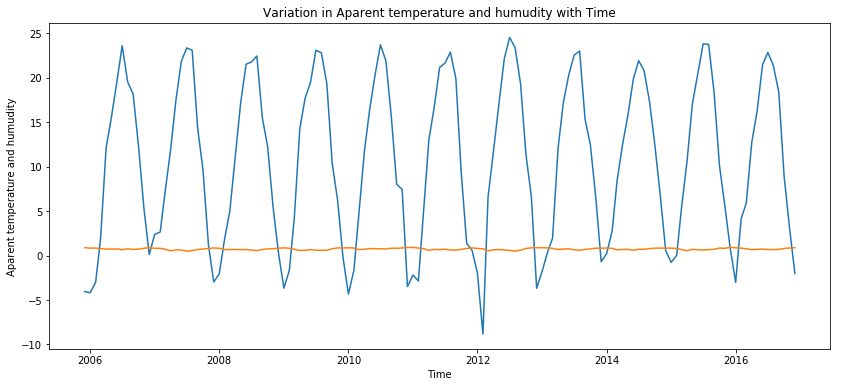

In [13]:
plt.figure(figsize=(14,6))
plt.title('Variation in Aparent temperature and humudity with Time')
plt.xlabel('Time')
plt.ylabel('Aparent temperature and humudity')
plt.plot(df_2)

In [15]:
df_april=df_2[df_2.index.month==4]

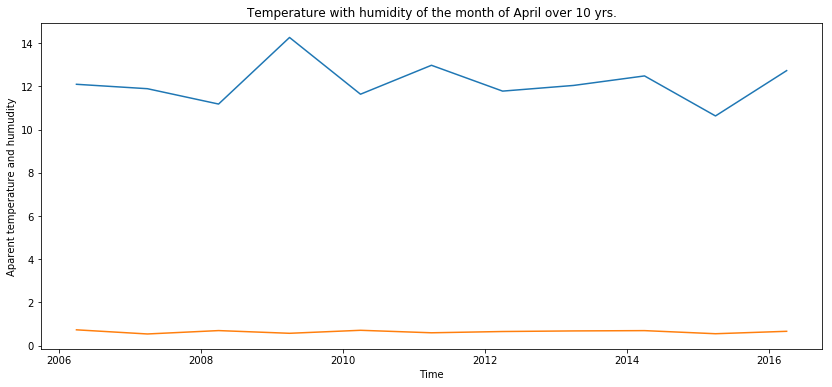

In [18]:
plt.figure(figsize=(14,6))
plt.title('Temperature with humidity of the month of April over 10 yrs.')
plt.xlabel('Time')
plt.ylabel('Aparent temperature and humudity')
plt.plot(df_april)

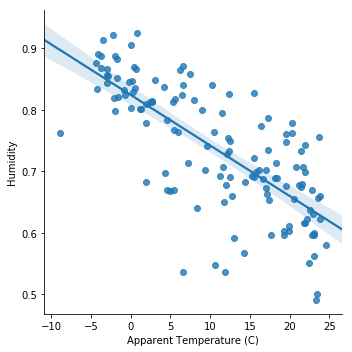

In [19]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df_2)
plt.show()

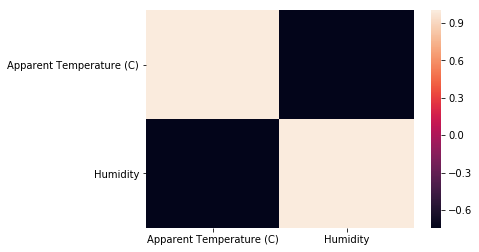

In [20]:
corr=df_2.corr()
sns.heatmap(corr)

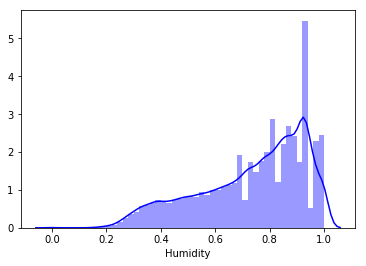

In [22]:
sns.distplot(df.Humidity,color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

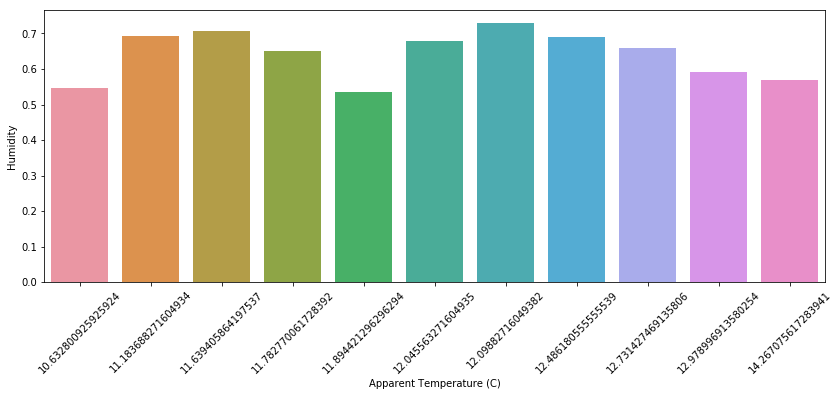

In [25]:
plt.figure(figsize=(14,5))
sns.barplot(x='Apparent Temperature (C)',y='Humidity',data=df_april)
plt.xticks(rotation=45)

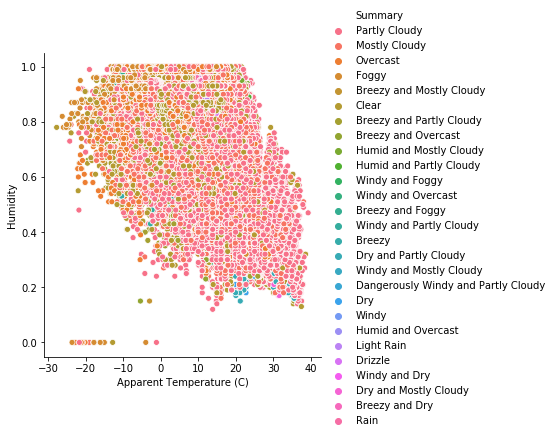

In [26]:
sns.relplot(data=df,x='Apparent Temperature (C)',y='Humidity',color='purple',hue='Summary')

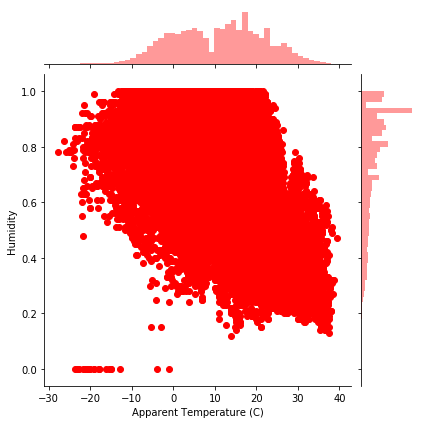

In [38]:
sns.jointplot(data=df,x='Apparent Temperature (C)',y='Humidity',color='red')